In [69]:
import numpy as np
import skimage

from skimage import io 
from skimage import data
from skimage import color
import matplotlib.pyplot as plt 
from skimage.feature import corner_subpix 
def plot(image, title, figsize = [8,8]):
    plt.figure(figsize= figsize)
    plt.title(title)
    plt.imshow(image, cmap= plt.cm.gray)
    plt.show()

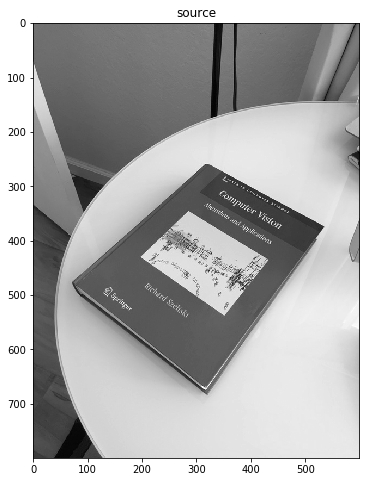

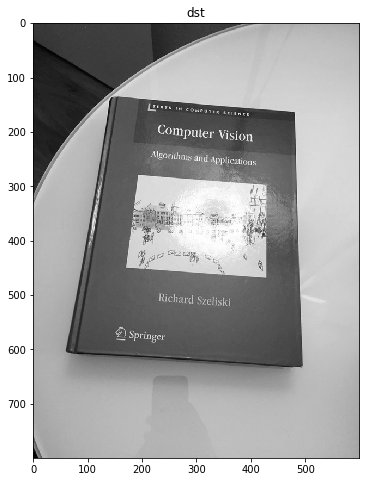

(17, 2)
(17, 2) (17, 2)


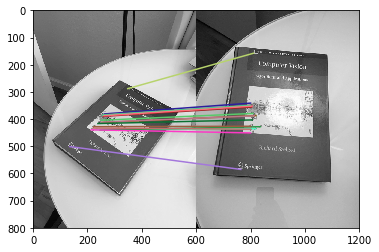

In [73]:
#########################################################
####### we want src image to transform to dst  image
####### that is warp src image according to parameters that
####### describes the motion of src to dst              #
#########################################################

# src,dst, _ = data.stereo_motorcycle()
src, dst = io.imread("./images/book1.jpg"), io.imread("./images/book2.jpg")
src, dst = color.rgb2gray(src), color.rgb2gray(dst)

''' rotate right image by 45 degree'''

# from skimage.transform import rotate, rescale
# dst = rotate(r, angle= 15)
plot(src, "source")
plot(dst, "dst")


############# extract features ###############
from skimage.feature import ORB , corner_subpix 
n_keypoints = 10000
src_ = ORB(n_keypoints= n_keypoints, )
dst_ = ORB(n_keypoints= n_keypoints)


src_.detect_and_extract(src)
dst_.detect_and_extract(dst)
########### match features ##################

from skimage.feature import match_descriptors

matches = match_descriptors(src_.descriptors,dst_.descriptors, max_ratio= 0.7)

print(matches.shape)

src_points = src_.keypoints[matches[:,0]]
dst_points  =dst_.keypoints[matches[:,1]]

print(src_points.shape, dst_points.shape)

###############################################
from skimage.feature import plot_matches
plot_matches(plt, src, dst, src_.keypoints, dst_.keypoints, matches, only_matches= True)

### Affine transform

affine params 
 [[   1.28404446   -0.71628604   39.10105634]
 [   0.92391681    1.1415756  -451.32548255]
 [   0.            0.            1.        ]]


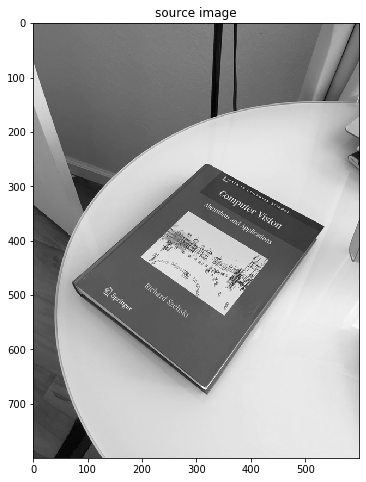

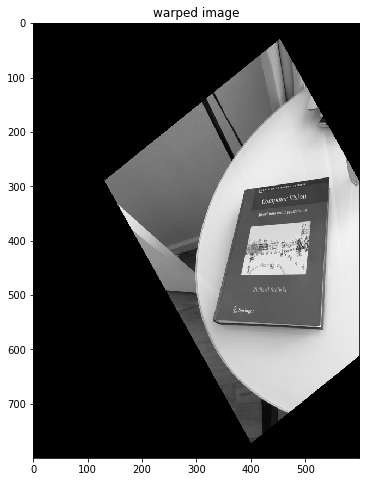

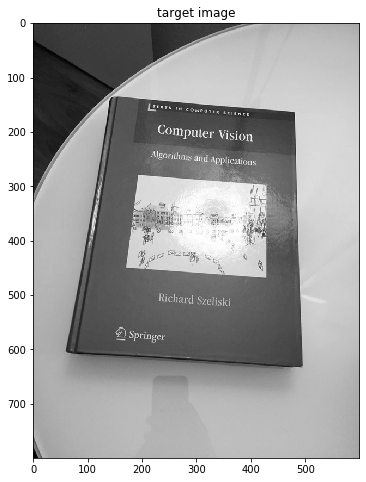

In [41]:
########################################
####### affine #########################

from skimage.transform import AffineTransform, warp

affine = AffineTransform()

#
# affine t0 = A*t1 + b
#

affine.estimate(src_points, dst_points)
print("affine params \n" , affine.params)



###############################################################################################
######### warping straight that is t1 to t0  as per above affine equation ######################

from skimage.transform import warp
warped_image = warp(src, inverse_map= affine.params)

plot(src, "source image")
plot(warped_image, title= "warped image")
plot(dst, "target image")


### perspective : its very important. it's not the number of kps, but the quality of kps that matters for the transormation to be correct

#### Perspective through matching points from matching algorithm 

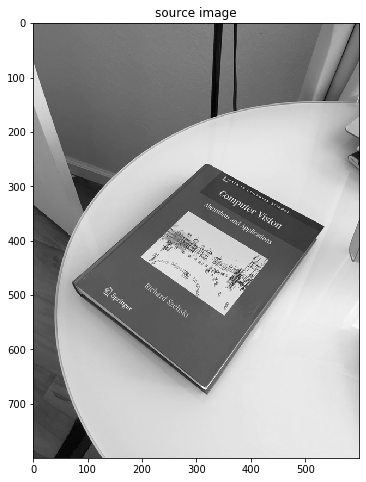

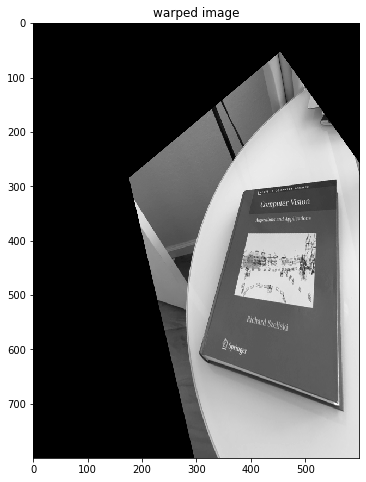

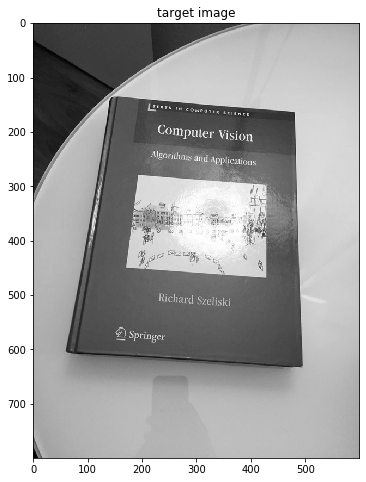

In [62]:
from skimage.transform import ProjectiveTransform, warp

projective = ProjectiveTransform()
projective.estimate(src_points, dst_points)

warped_image = warp(src, projective.params)

plot(src, "source image")
plot(warped_image, "warped image")
plot(dst, "target image")

#### Perspective through matching points choosen from hands, the four corners of book

In [65]:
from skimage.transform import ProjectiveTransform, warp
pts_src = np.array([[141, 131], [480, 159], [493, 630],[64, 601]])
pts_dst = np.array([[318, 256],[534, 372],[316, 670],[73, 473]])
print(pts_src.shape, pts_dst.shape)

(4, 2) (4, 2)


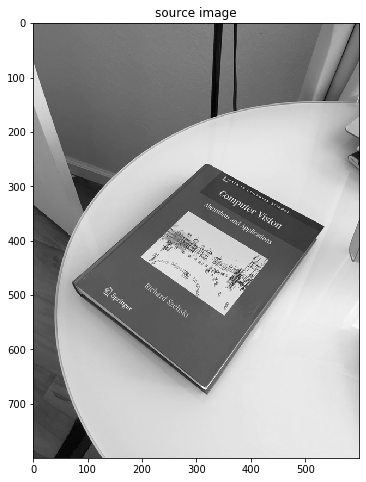

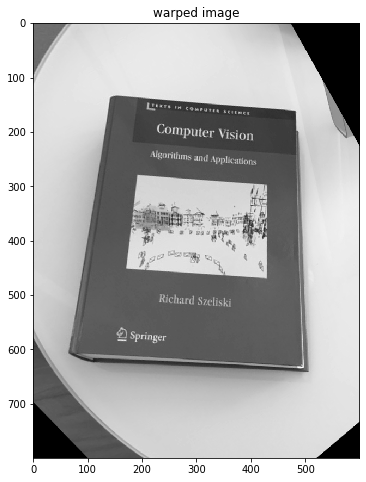

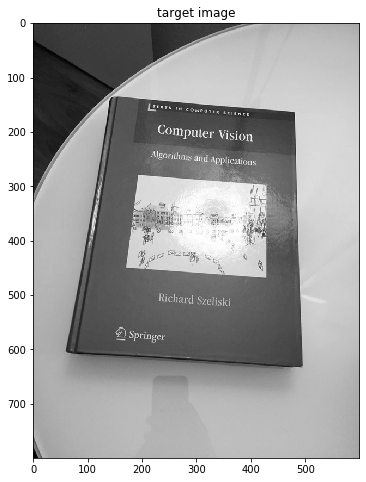

In [67]:
projective = ProjectiveTransform()
projective.estimate(pts_src, pts_dst)

warped_image = warp(src, projective.params)
plot(src, "source image")
plot(warped_image, "warped image")
plot(dst, "target image")

```python

from skimage.transform import estimate_transform 

estimate_transform()

Signature: estimate_transform(ttype, src, dst, **kwargs)
Docstring:
Estimate 2D geometric transformation parameters.

You can determine the over-, well- and under-determined parameters
with the total least-squares method.

Number of source and destination coordinates must match.

Parameters
----------
ttype : {'euclidean', similarity', 'affine', 'piecewise-affine',              'projective', 'polynomial'}
    Type of transform.
kwargs : array or int
    Function parameters (src, dst, n, angle)::

        NAME / TTYPE        FUNCTION PARAMETERS
        'euclidean'         `src, `dst`
        'similarity'        `src, `dst`
        'affine'            `src, `dst`
        'piecewise-affine'  `src, `dst`
        'projective'        `src, `dst`
        'polynomial'        `src, `dst`, `order` (polynomial order,
                                                  default order is 2)

    Also see examples below.

Returns
-------
tform : :class:`GeometricTransform`
    Transform object containing the transformation parameters and providing
    access to forward and inverse transformation functions.

Examples
--------
>>> import numpy as np
>>> from skimage import transform as tf

>>> # estimate transformation parameters
>>> src = np.array([0, 0, 10, 10]).reshape((2, 2))
>>> dst = np.array([12, 14, 1, -20]).reshape((2, 2))

>>> tform = tf.estimate_transform('similarity', src, dst)

>>> np.allclose(tform.inverse(tform(src)), src)
True

>>> # warp image using the estimated transformation
>>> from skimage import data
>>> image = data.camera()

>>> warp(image, inverse_map=tform.inverse) # doctest: +SKIP

>>> # create transformation with explicit parameters
>>> tform2 = tf.SimilarityTransform(scale=1.1, rotation=1,
...     translation=(10, 20))

>>> # unite transformations, applied in order from left to right
>>> tform3 = tform + tform2
>>> np.allclose(tform3(src), tform2(tform(src)))
True
File:      ~/anaconda3/lib/python3.7/site-packages/skimage/transform/_geometric.py
Type:      function

```

In [ ]:
from skimage.registration import optical_flow_tvl1
